# Scraping de notícias do portal MPSP

Na seção "Precisamos falar sobre isso" da edição de n. 10 do Informativo sobre o CSMP, de 05/05/2022, houve o questionamento sobre se não haveria uma exposição excessiva da pessoa do atual PGJ, Dr. Sarrubbo, nas publicações do portal Institucional.

Desprezando, por enquanto, as fotografias que ilustram o site, o programa a seguir recupera as manchetes do acervo de notícias, as organiza em planilha e pesquisa quantas vezes o nome do PGJ aparece no curso de sua gestão.

A automação foi feita com Python e Selenium, inicialmente no Google Colab. A organização dos dados foi feita com Pandas.

In [1]:
import pandas as pd

import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By

from time import sleep
from datetime import datetime

In [2]:
wd = webdriver.Chrome()
wd.get('https://www.mpsp.mp.br/noticias#')
wd.title

'Notícias MPSP - Ministério Público do Estado de São Paulo'

In [3]:
pag_inicial = 1
pag_final = 1579 # Última disponível no dia 08/05/2022

In [5]:
XPATH = '//*[@id="mpsp-publisher-_br_mp_mpsp_articles_web_MPSPPublisherPortlet_INSTANCE_fwnk_"]/form/div[2]/div[2]/div'
lista_completa = []
for pag in range (pag_inicial, pag_final+1):
    texto=''
    new_url = f'https://www.mpsp.mp.br/noticias#?page={pag}'
    wd.get(new_url)
    sleep(3)
    noticias = wd.find_element(By.XPATH, XPATH)
    texto += noticias.text
    texto = texto.split('\n')
    lista_parcial = []
    n = 0
    for elemento in texto:
      lista_parcial.append(elemento)
      n +=1
      if n == 3:
        lista_parcial.append(new_url)
        lista_completa.append(lista_parcial)
        n = 0
        lista_parcial=[]
        continue

In [6]:
df = pd.DataFrame(lista_completa, columns=['Natureza', 'Título', 'Data', 'Url'])

In [7]:
def trata_data(data_str):
  corresp = {'JAN':'01', 'FEV':'02', 'MAR':'03', 'ABR':'04', 'MAI':'05', 'JUN':'06', 
             'JUL':'07', 'AGO':'08', 'SET':'09', 'OUT':'10', 'NOV':'11', 'DEZ':'12'}
  data_str = data_str.replace(' ', '').upper() # Ex.: 02JUN08
  nova_data = '20'+ data_str[5:] + '-' + corresp[data_str[2:5]] + '-' + data_str[0:2]
  return nova_data

In [8]:
df['Data'] = df['Data'].apply(trata_data)
df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m-%d')
df.head(5)

,Natureza,Título,Data,Url
0,CRIMINAL,Condenado a 16 anos de prisão homem que matou ...,2022-05-06,https://www.mpsp.mp.br/noticias#?page=1
1,ADMINISTRAÇÃO SUPERIOR E GESTÃO,"SISMP Digital ganha módulo PANI, para andament...",2022-05-06,https://www.mpsp.mp.br/noticias#?page=1
2,CRIMINAL,"Em entrevista ao MPSP+, promotor de Justiça ex...",2022-05-06,https://www.mpsp.mp.br/noticias#?page=1
3,CRIMINAL,Denunciado por matar mulher grávida em Guarulh...,2022-05-06,https://www.mpsp.mp.br/noticias#?page=1
4,TUTELA COLETIVA E CÍVEL,Sede do MPSP ganha iluminação especial em camp...,2022-05-06,https://www.mpsp.mp.br/noticias#?page=1


In [9]:
df.to_excel('noticias_portal.xlsx')

In [10]:
# Opção: restrição do dataframe à gestão Sarrubbo
criterio = df['Data'] >= '2020-04-06'
df_s = df[criterio]
df_s['Com menção Dr. Sarrubbo'] = df_s['Título'].str.contains('Sarrubbo') |df_s['Título'].str.contains('SARRUBBO')
df_s = df_s.set_index('Data')
df_s

<ipython-input-10-ce43cf753af2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['Com menção Dr. Sarrubbo'] = df_s['Título'].str.contains('Sarrubbo') |df_s['Título'].str.contains('SARRUBBO')


,Natureza,Título,Url,Com menção Dr. Sarrubbo
Data,,,,
2022-05-06,CRIMINAL,Condenado a 16 anos de prisão homem que matou ...,https://www.mpsp.mp.br/noticias#?page=1,False
2022-05-06,ADMINISTRAÇÃO SUPERIOR E GESTÃO,"SISMP Digital ganha módulo PANI, para andament...",https://www.mpsp.mp.br/noticias#?page=1,False
2022-05-06,CRIMINAL,"Em entrevista ao MPSP+, promotor de Justiça ex...",https://www.mpsp.mp.br/noticias#?page=1,False
2022-05-06,CRIMINAL,Denunciado por matar mulher grávida em Guarulh...,https://www.mpsp.mp.br/noticias#?page=1,False
2022-05-06,TUTELA COLETIVA E CÍVEL,Sede do MPSP ganha iluminação especial em camp...,https://www.mpsp.mp.br/noticias#?page=1,False
...,...,...,...,...
2020-04-06,ADMINISTRAÇÃO SUPERIOR E GESTÃO,Promotoria de Justiça de Brodowski atende por ...,https://www.mpsp.mp.br/noticias#?page=376,False
2020-04-06,ADMINISTRAÇÃO SUPERIOR E GESTÃO,Gaeco - Núcleo Piracicaba atende por e-mail e ...,https://www.mpsp.mp.br/noticias#?page=376,False
2020-04-06,ADMINISTRAÇÃO SUPERIOR E GESTÃO,"Promotoria obtém R$ 1,5 milhão para saúde em m...",https://www.mpsp.mp.br/noticias#?page=376,False


In [11]:
df_s.to_excel('noticias_portal_sarrubbo.xlsx')

In [12]:
a = df_s.groupby(pd.Grouper(freq='W'))['Com menção Dr. Sarrubbo'].sum()
b = df_s.groupby(pd.Grouper(freq='W'))['Título'].count()
a = pd.DataFrame(a)
b = pd.DataFrame(b)
df_1 = b.join(a)
df_1

,Título,Com menção Dr. Sarrubbo
Data,,
2020-04-12,33,1.0
2020-04-19,38,1.0
2020-04-26,32,3.0
2020-05-03,30,2.0
2020-05-10,35,2.0
...,...,...
2022-04-10,26,1.0
2022-04-17,19,3.0
2022-04-24,13,3.0


In [13]:
df_1['Sem menção'] = df_1['Título']-df_1['Com menção Dr. Sarrubbo']
df_1[['Título', 'Sem menção', 'Com menção Dr. Sarrubbo']]

,Título,Sem menção,Com menção Dr. Sarrubbo
Data,,,
2020-04-12,33,32.0,1.0
2020-04-19,38,37.0,1.0
2020-04-26,32,29.0,3.0
2020-05-03,30,28.0,2.0
2020-05-10,35,33.0,2.0
...,...,...,...
2022-04-10,26,25.0,1.0
2022-04-17,19,16.0,3.0
2022-04-24,13,10.0,3.0


In [14]:
df_1[['Título', 'Sem menção', 'Com menção Dr. Sarrubbo']].to_csv('N_de_mencoes.txt')

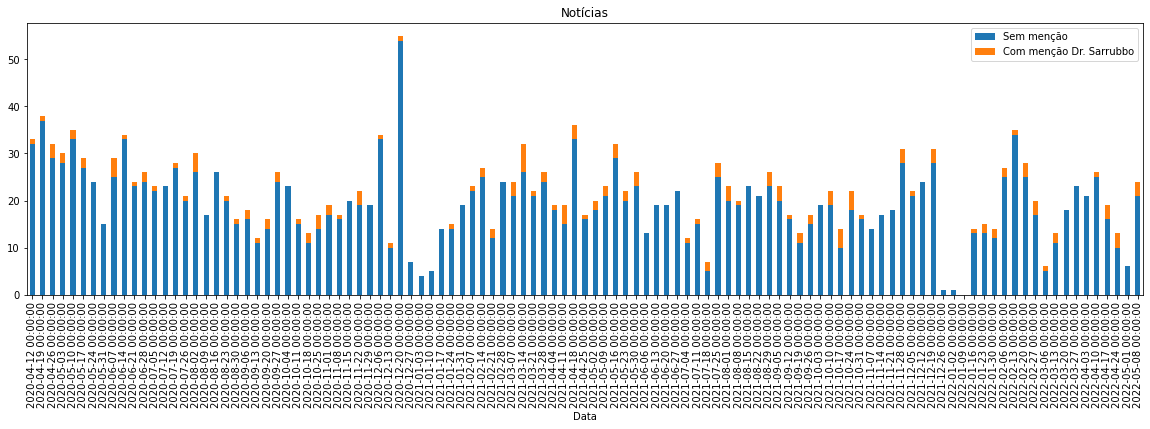

In [21]:
df_1[['Sem menção', 'Com menção Dr. Sarrubbo']].plot.bar(figsize=(20,5), stacked=True, title='Notícias')

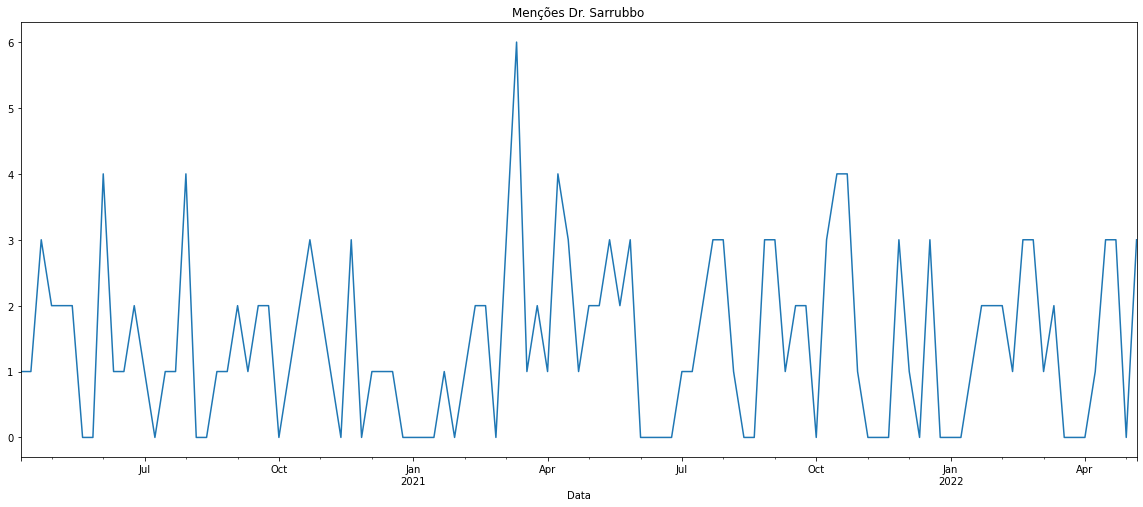

In [22]:
df_1['Com menção Dr. Sarrubbo'].plot(figsize=(20,8), title='Menções Dr. Sarrubbo')

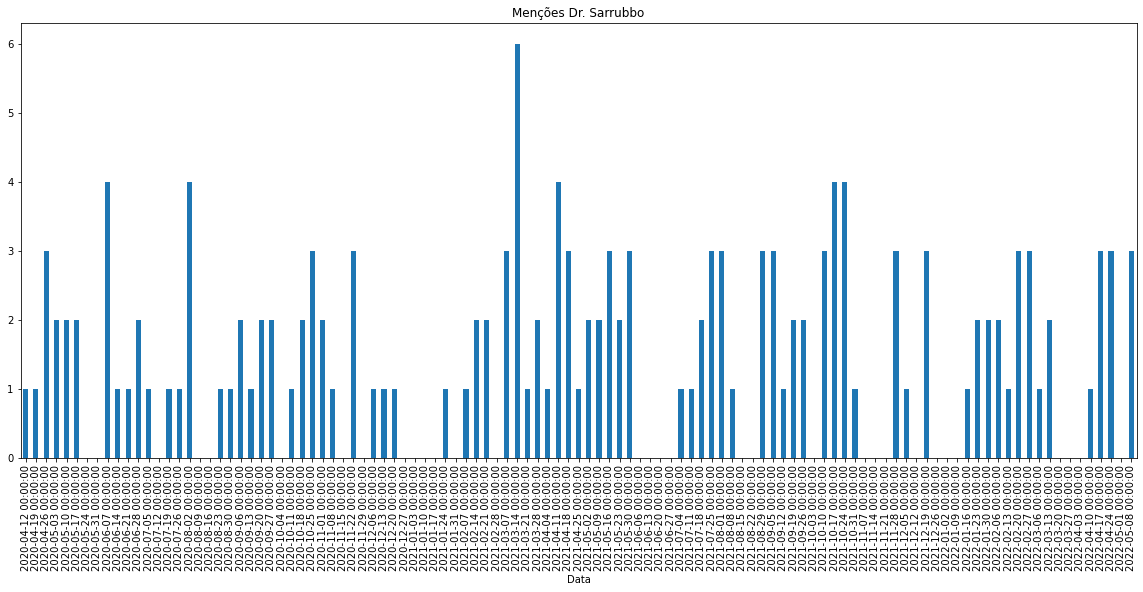

In [23]:
df_1['Com menção Dr. Sarrubbo'].plot.bar(figsize=(20,8), title='Menções Dr. Sarrubbo')